In [53]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

##########################################
#code de recuperation des données externes
urlexo_pllist = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+distinct+\
pl_name,disc_year,sy_dist,discoverymethod,pl_bmasse,pl_rade,pl_orbper,pl_eqt,pl_dens\
+from+ps+&format=json"
response = requests.get(urlexo_pllist)
data_pllist = response.json()

In [54]:
data_pllist[10]

{'pl_name': 'HD 108236 e',
 'disc_year': 2020,
 'sy_dist': 64.5978,
 'discoverymethod': 'Transit',
 'pl_bmasse': None,
 'pl_rade': None,
 'pl_orbper': 19.590186,
 'pl_eqt': None,
 'pl_dens': None}

In [55]:
len(data_pllist)

32843

In [56]:
aggregated_data = {}
for row in data_pllist:
    pl_name = row['pl_name']
    if pl_name not in aggregated_data:
        aggregated_data[pl_name] = row
    else:
        for key in row:
            if key != 'pl_name' and row[key] is not None:
                # Conserver la valeur maximale pour les autres colonnes
                aggregated_data[pl_name][key] = max(aggregated_data[pl_name][key], row[key]) if aggregated_data[pl_name][key] is not None else row[key]


In [57]:
len(aggregated_data)

5905

In [58]:
print(aggregated_data['bet Pic b'])

{'pl_name': 'bet Pic b', 'disc_year': 2008, 'sy_dist': 19.7442, 'discoverymethod': 'Imaging', 'pl_bmasse': 6356.0, 'pl_rade': 18.49485, 'pl_orbper': 8617.50952, 'pl_eqt': 1650.0, 'pl_dens': None}


In [59]:
# Convertir en une liste de tuples pour MDDataTable
data_table_tuple = [
    (row['pl_name'], row['disc_year'], row['sy_dist'], row['discoverymethod'], row['pl_bmasse'], row['pl_rade'], row['pl_orbper'],row['pl_eqt'], row['pl_dens'])
    for row in aggregated_data.values()
]

In [60]:
data_table_tuple[0:2]

[('bet Pic b',
  2008,
  19.7442,
  'Imaging',
  6356.0,
  18.49485,
  8617.50952,
  1650.0,
  None),
 ('HD 180314 b',
  2010,
  122.362,
  'Radial Velocity',
  7216.92963775,
  None,
  396.03,
  None,
  None)]

In [61]:
print(aggregated_data['bet Pic b']["pl_name"])

bet Pic b


In [62]:
#cle associés
keys = ["pl_name","disc_year","sy_dist","discoverymethod","pl_bmasse","pl_rade","pl_orbper","pl_eqt","pl_dens"]

#conversion en liste de dict
data_table_dict = [dict(zip(keys, tpl)) for tpl in data_table_tuple]

In [63]:
data_table_dict[0:3]

[{'pl_name': 'bet Pic b',
  'disc_year': 2008,
  'sy_dist': 19.7442,
  'discoverymethod': 'Imaging',
  'pl_bmasse': 6356.0,
  'pl_rade': 18.49485,
  'pl_orbper': 8617.50952,
  'pl_eqt': 1650.0,
  'pl_dens': None},
 {'pl_name': 'HD 180314 b',
  'disc_year': 2010,
  'sy_dist': 122.362,
  'discoverymethod': 'Radial Velocity',
  'pl_bmasse': 7216.92963775,
  'pl_rade': None,
  'pl_orbper': 396.03,
  'pl_eqt': None,
  'pl_dens': None},
 {'pl_name': 'gam Lib b',
  'disc_year': 2018,
  'sy_dist': 47.4017,
  'discoverymethod': 'Radial Velocity',
  'pl_bmasse': 357.87478628,
  'pl_rade': None,
  'pl_orbper': 415.2,
  'pl_eqt': None,
  'pl_dens': None}]

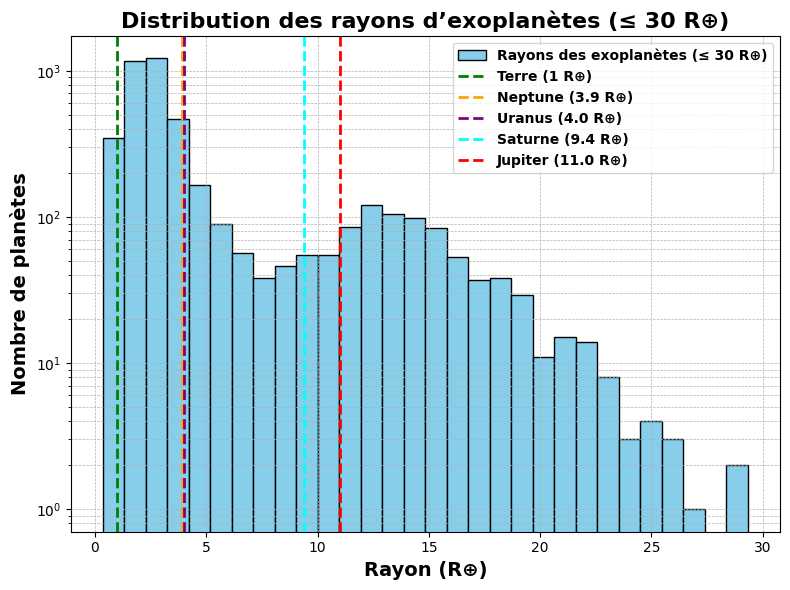

In [64]:
 # Extraire les rayons valides sous forme numérique
rayons = pd.to_numeric(
    [item['pl_rade'] for item in data_table_dict if item['pl_rade'] is not None],
    errors='coerce'
)
rayons = rayons[(rayons > 0) & (rayons <= 30)]  # Ne garder que les rayons ≤ 30 R⊕

fig3, ax = plt.subplots(figsize=(8, 6))

# Histogramme
ax.hist(rayons, bins=30, color='skyblue', edgecolor='black', label='Rayons des exoplanètes (≤ 30 R⊕)')

# Ajouter des lignes pour les planètes du système solaire
ax.axvline(x=1.0, color='green', linestyle='--', linewidth=2, label='Terre (1 R⊕)')
ax.axvline(x=3.9, color='orange', linestyle='--', linewidth=2, label='Neptune (3.9 R⊕)')
ax.axvline(x=4.0, color='purple', linestyle='--', linewidth=2, label='Uranus (4.0 R⊕)')
ax.axvline(x=9.4, color='cyan', linestyle='--', linewidth=2, label='Saturne (9.4 R⊕)')
ax.axvline(x=11.0, color='red', linestyle='--', linewidth=2, label='Jupiter (11.0 R⊕)')

# Paramètres du graphique
ax.set_xlabel("Rayon (R⊕)", fontsize=14, fontweight='bold')
ax.set_ylabel("Nombre de planètes", fontsize=14, fontweight='bold')
ax.set_title("Distribution des rayons d’exoplanètes (≤ 30 R⊕)", fontsize=16, fontweight='bold')
ax.set_yscale('log')
ax.grid(True, which="both", linestyle='--', linewidth=0.5)

# Légende en gras
ax.legend(loc='upper right', fontsize=12, prop={'weight': 'bold'})

plt.tight_layout()

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir en DataFrame
df = pd.DataFrame(data_table_dict)

# Remplacer les valeurs None dans 'pl_rade' par 1
df['pl_rade'] = df['pl_rade'].fillna(1)

# Supprimer les lignes avec des valeurs manquantes critiques (pl_bmasse ou pl_orbper)
df = df.dropna(subset=['pl_bmasse', 'pl_orbper'])

# Préparer les données
df['size'] = df['pl_rade'] * 10
methods = df['discoverymethod'].unique()
colors = {method: plt.cm.tab10(i % 10) for i, method in enumerate(methods)}


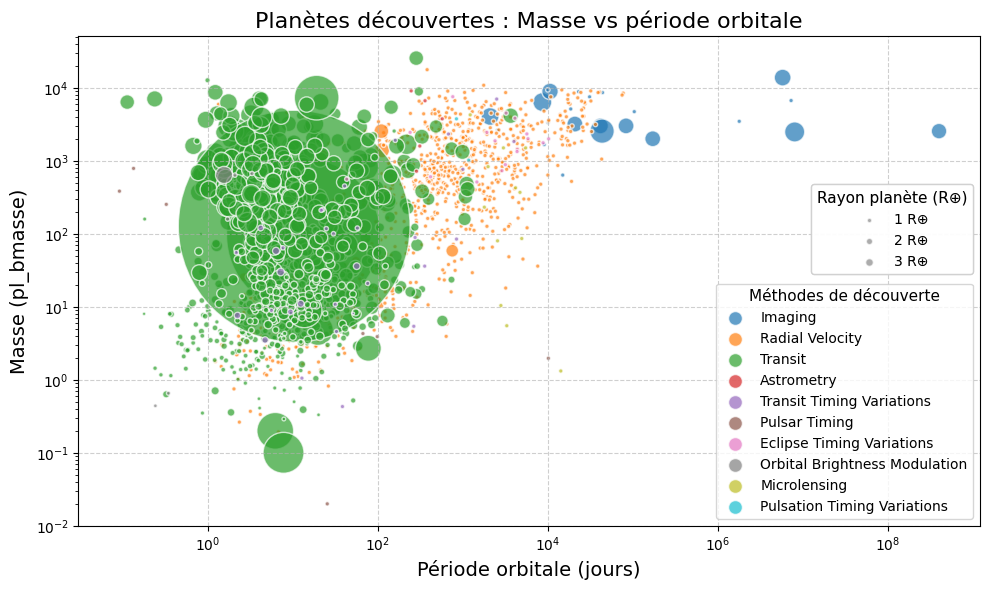

In [66]:
plt.figure(figsize=(10, 6))

# Tracé des points par méthode
for method in methods:
    subset = df[df['discoverymethod'] == method]
    plt.scatter(
        subset['pl_orbper'], subset['pl_bmasse'],
        s=subset['size'],
        color=colors[method],
        label=method,
        alpha=0.7,
        edgecolors='w'
    )

# 🎯 Légende des méthodes (en bas à droite)
legend_handles_methods = [
    plt.scatter([], [], s=100, color=colors[method], label=method, alpha=0.7, edgecolors='w')
    for method in methods
]
legend_methods = plt.legend(
    handles=legend_handles_methods,
    title="Méthodes de découverte",
    fontsize=10,
    title_fontsize=11,
    loc="lower right",
    bbox_to_anchor=(1, 0)
)
plt.gca().add_artist(legend_methods)

# 🎯 Légende des tailles (plus haut, au-dessus)
size_legend_values = [1, 2, 3]
size_legend_handles = [
    plt.scatter([], [], s=rade * 10, color='gray', alpha=0.6, label=f"{rade} R⊕", edgecolors='w')
    for rade in size_legend_values
]
legend_sizes = plt.legend(
    handles=size_legend_handles,
    title="Rayon planète (R⊕)",
    fontsize=10,
    title_fontsize=11,
    loc="lower right",
    bbox_to_anchor=(1, 0.50)  # ↖️ Ajusté pour apparaître clairement au-dessus
)
plt.gca().add_artist(legend_sizes)

# Détails du graphique
plt.title("Planètes découvertes : Masse vs période orbitale", fontsize=16)
plt.xlabel("Période orbitale (jours)", fontsize=14)
plt.ylabel("Masse (pl_bmasse)", fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


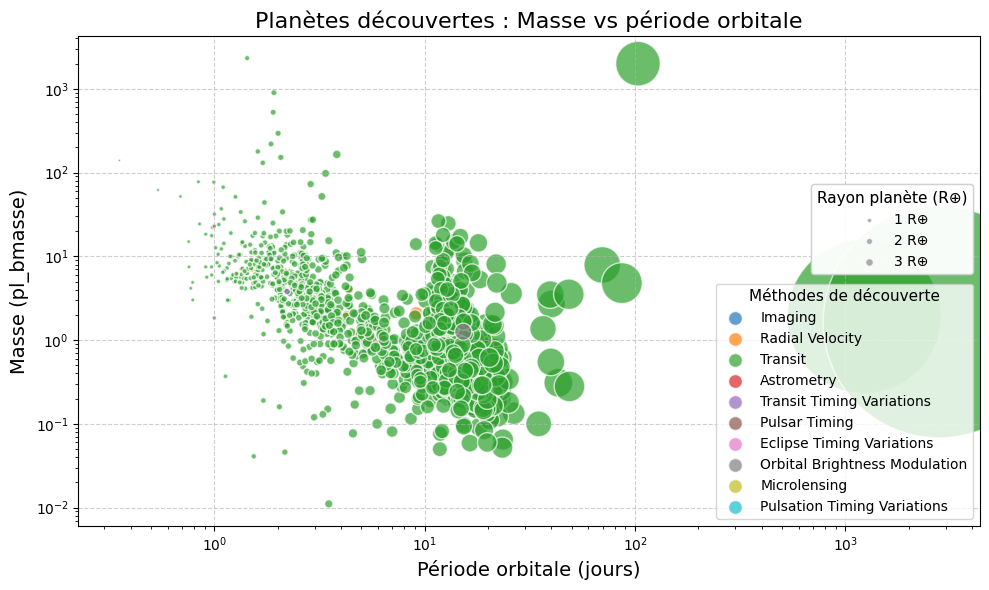

In [67]:
plt.figure(figsize=(10, 6))

# Tracé des points par méthode
for method in methods:
    subset = df[df['discoverymethod'] == method]
    plt.scatter(
        subset['pl_rade'], subset['pl_dens'],
        s=subset['size'],
        color=colors[method],
        label=method,
        alpha=0.7,
        edgecolors='w'
    )

# 🎯 Légende des méthodes (en bas à droite)
legend_handles_methods = [
    plt.scatter([], [], s=100, color=colors[method], label=method, alpha=0.7, edgecolors='w')
    for method in methods
]
legend_methods = plt.legend(
    handles=legend_handles_methods,
    title="Méthodes de découverte",
    fontsize=10,
    title_fontsize=11,
    loc="lower right",
    bbox_to_anchor=(1, 0)
)
plt.gca().add_artist(legend_methods)

# 🎯 Légende des tailles (plus haut, au-dessus)
size_legend_values = [1, 2, 3]
size_legend_handles = [
    plt.scatter([], [], s=rade * 10, color='gray', alpha=0.6, label=f"{rade} R⊕", edgecolors='w')
    for rade in size_legend_values
]
legend_sizes = plt.legend(
    handles=size_legend_handles,
    title="Rayon planète (R⊕)",
    fontsize=10,
    title_fontsize=11,
    loc="lower right",
    bbox_to_anchor=(1, 0.50)  # ↖️ Ajusté pour apparaître clairement au-dessus
)
plt.gca().add_artist(legend_sizes)

# Détails du graphique
plt.title("Planètes découvertes : Masse vs période orbitale", fontsize=16)
plt.xlabel("Période orbitale (jours)", fontsize=14)
plt.ylabel("Masse (pl_bmasse)", fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

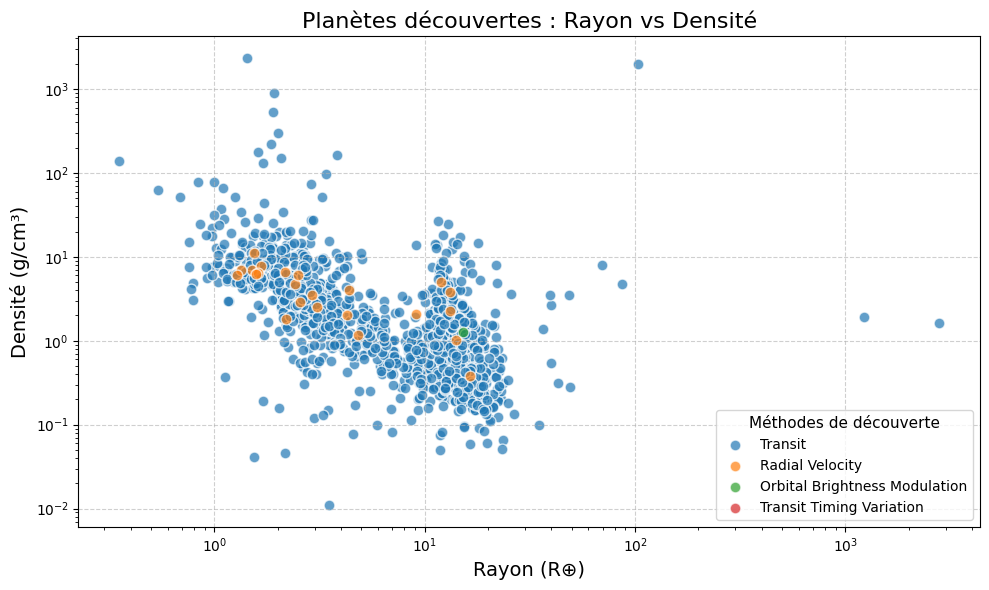

In [76]:
import matplotlib.pyplot as plt

# Méthodes à afficher
selected_methods = [
    "Transit",
    "Radial Velocity",
    "Orbital Brightness Modulation",
    "Transit Timing Variation"
]

# Filtrer le DataFrame
filtered_df = df[df['discoverymethod'].isin(selected_methods)]

# Redéfinir la palette de couleurs pour les méthodes sélectionnées
colors = {method: plt.cm.tab10(i) for i, method in enumerate(selected_methods)}

# Taille fixe pour tous les points
point_size = 60

# Tracé
plt.figure(figsize=(10, 6))

for method in selected_methods:
    subset = filtered_df[filtered_df['discoverymethod'] == method]
    plt.scatter(
        subset['pl_rade'], subset['pl_dens'],
        s=point_size,
        color=colors[method],
        label=method,
        alpha=0.7,
        edgecolors='w'
    )

# Légende des méthodes (couleur)
legend_handles_methods = [
    plt.scatter([], [], s=point_size, color=colors[method], label=method, alpha=0.7, edgecolors='w')
    for method in selected_methods
]
plt.legend(
    handles=legend_handles_methods,
    title="Méthodes de découverte",
    fontsize=10,
    title_fontsize=11,
    loc="lower right",
    bbox_to_anchor=(1, 0)
)

# Titre et axes
plt.title("Planètes découvertes : Rayon vs Densité", fontsize=16)
plt.xlabel("Rayon (R⊕)", fontsize=14)
plt.ylabel("Densité (g/cm³)", fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


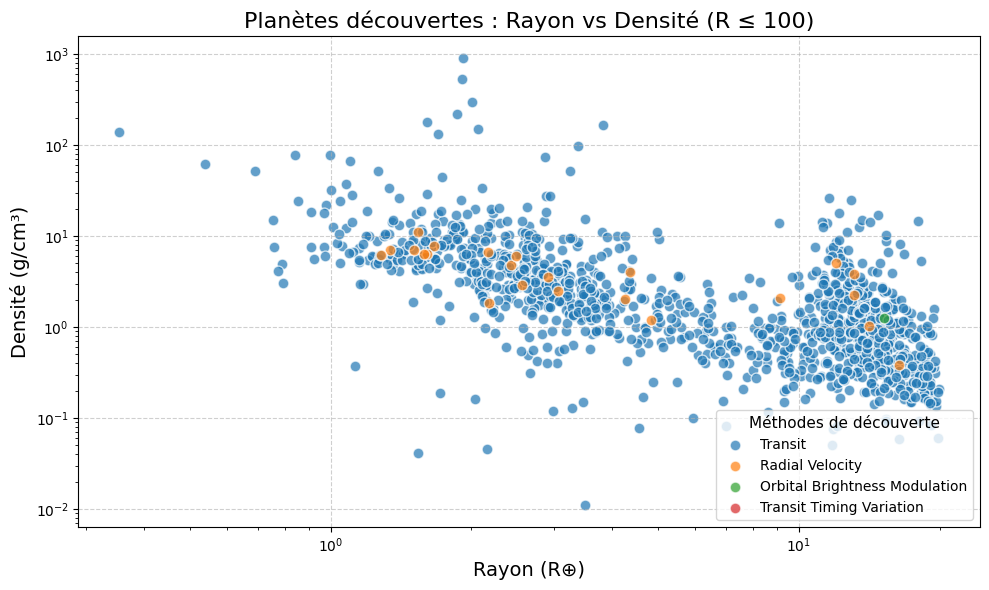

In [75]:
import matplotlib.pyplot as plt

# Méthodes à afficher
selected_methods = [
    "Transit",
    "Radial Velocity",
    "Orbital Brightness Modulation",
    "Transit Timing Variation"
]

# Filtrer le DataFrame par méthode et rayon
filtered_df = df[
    (df['discoverymethod'].isin(selected_methods)) &
    (df['pl_rade'] <= 20)&  # Éliminer les rayons > 100 R⊕
    (df['pl_dens'] <= 2000)
]

# Redéfinir les couleurs pour les méthodes sélectionnées
colors = {method: plt.cm.tab10(i) for i, method in enumerate(selected_methods)}

# Taille fixe pour tous les points
point_size = 60

# Tracé
plt.figure(figsize=(10, 6))

for method in selected_methods:
    subset = filtered_df[filtered_df['discoverymethod'] == method]
    plt.scatter(
        subset['pl_rade'], subset['pl_dens'],
        s=point_size,
        color=colors[method],
        label=method,
        alpha=0.7,
        edgecolors='w'
    )

# Légende des méthodes
legend_handles_methods = [
    plt.scatter([], [], s=point_size, color=colors[method], label=method, alpha=0.7, edgecolors='w')
    for method in selected_methods
]
plt.legend(
    handles=legend_handles_methods,
    title="Méthodes de découverte",
    fontsize=10,
    title_fontsize=11,
    loc="lower right",
    bbox_to_anchor=(1, 0)
)

# Titre et axes
plt.title("Planètes découvertes : Rayon vs Densité (R ≤ 100)", fontsize=16)
plt.xlabel("Rayon (R⊕)", fontsize=14)
plt.ylabel("Densité (g/cm³)", fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


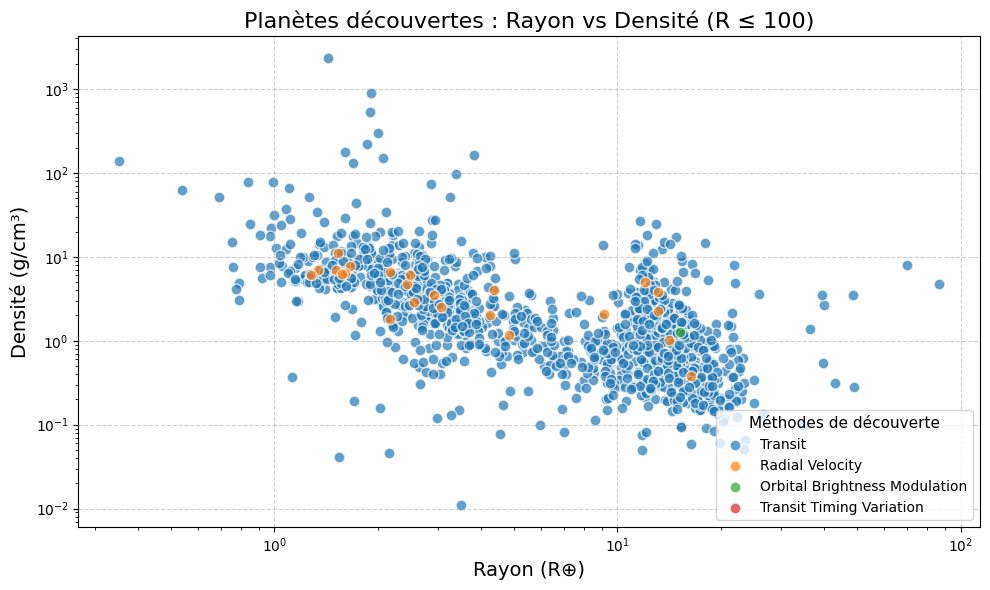

In [70]:
import matplotlib.pyplot as plt

# Méthodes à afficher
selected_methods = [
    "Transit",
    "Radial Velocity",
    "Orbital Brightness Modulation",
    "Transit Timing Variation"
]

# Filtrer le DataFrame par méthode et rayon
filtered_df = df[
    (df['discoverymethod'].isin(selected_methods)) &
    (df['pl_rade'] <= 100)&  # Éliminer les rayons > 100 R⊕
    (df['pl_dens'] <= 10000)
]

# Redéfinir les couleurs pour les méthodes sélectionnées
colors = {method: plt.cm.tab10(i) for i, method in enumerate(selected_methods)}

# Taille fixe pour tous les points
point_size = 60

# Tracé
plt.figure(figsize=(10, 6))

for method in selected_methods:
    subset = filtered_df[filtered_df['discoverymethod'] == method]
    plt.scatter(
        subset['pl_rade'], subset['pl_dens'],
        s=point_size,
        color=colors[method],
        label=method,
        alpha=0.7,
        edgecolors='w'
    )

# Légende des méthodes
legend_handles_methods = [
    plt.scatter([], [], s=point_size, color=colors[method], label=method, alpha=0.7, edgecolors='w')
    for method in selected_methods
]
plt.legend(
    handles=legend_handles_methods,
    title="Méthodes de découverte",
    fontsize=10,
    title_fontsize=11,
    loc="lower right",
    bbox_to_anchor=(1, 0)
)

# Titre et axes
plt.title("Planètes découvertes : Rayon vs Densité (R ≤ 100)", fontsize=16)
plt.xlabel("Rayon (R⊕)", fontsize=14)
plt.ylabel("Densité (g/cm³)", fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [71]:
filtered_df['pl_name']

7       Kepler-44 b
9         WASP-76 b
15      HD 149026 b
16       HAT-P-24 b
18       HAT-P-54 b
           ...     
5826      TOI-238 c
5829      NGTS-26 b
5833     TOI-3364 b
5862     CoRoT-24 b
5899     WASP-185 b
Name: pl_name, Length: 1337, dtype: object

In [72]:
filtered_df

,pl_name,disc_year,sy_dist,discoverymethod,pl_bmasse,pl_rade,pl_orbper,pl_eqt,pl_dens,size
7,Kepler-44 b,2011,1188.0000,Transit,327.364900,13.900000,3.250966,1603.0,0.9400,139.000000
9,WASP-76 b,2016,194.4590,Transit,292.403600,21.955555,1.809886,2231.0,0.2010,219.555549
15,HD 149026 b,2005,75.8643,Radial Velocity,120.775400,9.113000,2.876600,1634.0,2.0881,91.130000
16,HAT-P-24 b,2010,415.3440,Transit,238.372500,15.497187,3.355248,1637.0,0.4670,154.971874
18,HAT-P-54 b,2015,143.6510,Transit,578.450600,40.000000,3.800010,818.0,2.7000,400.000000
...,...,...,...,...,...,...,...,...,...,...
5826,TOI-238 c,2024,80.5407,Radial Velocity,6.700000,2.180000,8.465651,696.0,1.8300,21.800000
5829,NGTS-26 b,2024,1093.6900,Transit,92.805895,14.885526,4.519928,1331.0,0.1530,148.855264
5833,TOI-3364 b,2023,277.8990,Transit,530.773440,12.392501,5.876944,1264.0,1.6000,123.925008
5862,CoRoT-24 b,2014,591.5550,Transit,5.700000,3.700000,5.113400,1070.0,0.9000,37.000000


In [73]:
filtered_df.columns

Index(['pl_name', 'disc_year', 'sy_dist', 'discoverymethod', 'pl_bmasse',
       'pl_rade', 'pl_orbper', 'pl_eqt', 'pl_dens', 'size'],
      dtype='object')

In [74]:
# Accéder aux données pour "TOI-178 d"
toi_178_d = filtered_df.loc[filtered_df['pl_name'] == 'TOI-178 d']
toi_178_d

,pl_name,disc_year,sy_dist,discoverymethod,pl_bmasse,pl_rade,pl_orbper,pl_eqt,pl_dens,size
3281,TOI-178 d,2021,62.699,Transit,3.01,2.572,6.557851,690.0,0.976,25.72
